In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('final.txt')

# prepare the modified Data
df2= pd.DataFrame()
df2['pair']=df['pair']
df2['chain1'] = df2['pair'].apply(lambda x: x.split('_')[1])
df2['chain2'] = df2['pair'].apply(lambda x: x.split('_')[3])
df2['pdb_id'] = df2['pair'].apply(lambda x: x.split('_')[0])
structures = df2['pdb_id'].unique()
df2['number_of_chains'] = [len(set(df2[df2['pdb_id']==i]['chain1']).union(set(df2[df2['pdb_id']==i]['chain2']))) for i in df2['pdb_id']]
df2['obs_contact']=df['obs_contact']
df2['number_of_contacts'] = [len(df2[(df2['pdb_id']==i) & (df2['obs_contact']>10)]) for i in df2['pdb_id']]
df2['ratio']=df2['number_of_contacts']/df2['number_of_chains']

In [17]:
#len(df2[df2['number_of_chains']==6])
df2[['pdockq2','Interaction Energy']]=df[['pdockq2','Interaction Energy']]
#df2[df2['number_of_chains']==2][['pair','number_of_chains','number_of_contacts','obs_contact','ratio','pdockq2','Interaction Energy']].sort_values(by=['pair'])
#df2['number_of_contacts']/df2['number_of_chains']
df2[(df2['pdb_id']=='5LE5') & (df2['pair'].str.contains('_H')) & (df2['obs_contact']>=10)]
#df2.sort_values(by=['pair'])

,pair,chain1,chain2,pdb_id,number_of_chains,obs_contact,number_of_contacts,ratio,pdockq2,Interaction Energy
69,5LE5_H_5LE5_b,H,b,5LE5,14,29,34,2.428571,0.030,1.94221
684,5LE5_H_5LE5_L,H,L,5LE5,14,67,34,2.428571,0.602,-1.65199
764,5LE5_H_5LE5_I,H,I,5LE5,14,87,34,2.428571,0.763,-8.53793
803,5LE5_H_5LE5_a,H,a,5LE5,14,54,34,2.428571,0.310,1.71696
859,5LE5_A_5LE5_H,A,H,5LE5,14,16,34,2.428571,0.681,-1.15956
1038,5LE5_G_5LE5_H,G,H,5LE5,14,24,34,2.428571,0.806,-1.39973


In [18]:
len(df2[(df2.obs_contact >= 10) & (df2['pdb_id'] == '5LE5')])

34

In [4]:
chains_dic={}
for st in structures:
    for _,row in df2.iterrows():
        if row['pdb_id']==st:
            chains_dic[st]=row['number_of_chains']
            break


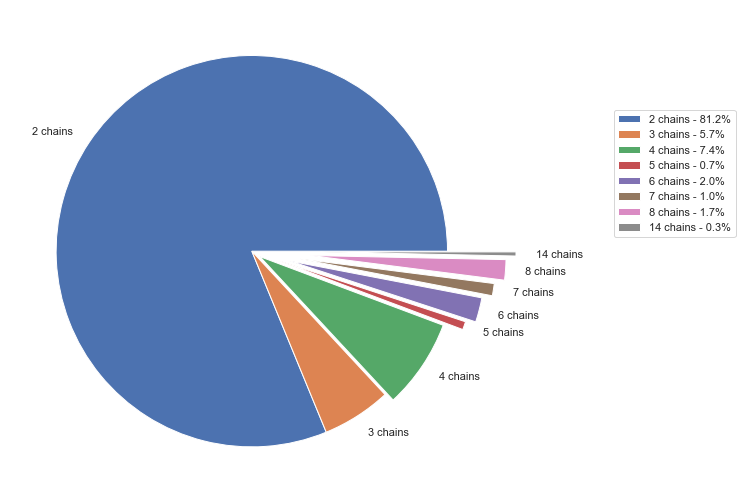

In [60]:
# Data
labels = ['2 chains', '3 chains', '4 chains', '5 chains', '6 chains', '7 chains', '8 chains', '14 chains']
sizes = [242, 17, 22, 2, 6, 3, 5, 1]

# Create the pie plot
plt.figure(figsize=(9, 9))
explode=(0,0.0,0.05,0.15,0.2,0.25,0.3,0.35)
plt.pie(sizes, labels=labels, explode=explode) #autopct='%1.1f%%'
plt.legend(frameon=True, 
          bbox_to_anchor=(1.5,0.8), 
          labels=['%s - %1.1f%%' % (l, s/np.sum(sizes)*100) for l, s in zip(labels, sizes)]
         )
# Add a title
#plt.title('Distribution of Structures by Chain Count')

# Display the plot
plt.show()

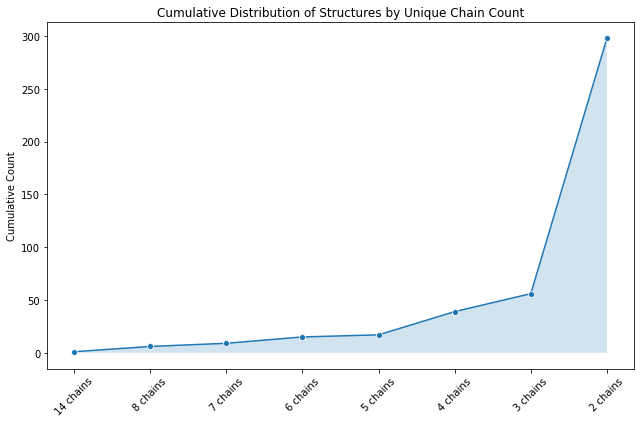

In [8]:
# Data
labels = ['2 chains', '3 chains', '4 chains', '5 chains', '6 chains', '7 chains', '8 chains', '14 chains']
sizes = [242, 17, 22, 2, 6, 3, 5, 1]

# Reverse the data
reversed_labels = labels[::-1]
reversed_sizes = sizes[::-1]

# Calculate the cumulative sum of reversed sizes
reversed_cumulative_sizes = np.cumsum(reversed_sizes)

# Create the reversed line plot
plt.figure(figsize=(9, 6))
sns.lineplot(x=reversed_labels, y=reversed_cumulative_sizes, marker='o')

# Add shading
plt.fill_between(reversed_labels, 0, reversed_cumulative_sizes, alpha=0.2)

# Add labels and title
#plt.xlabel('Number of Unique Chains')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Distribution of Structures by Unique Chain Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(False)

# Adjust the plot layout
plt.tight_layout()

# Display the plot
plt.show()

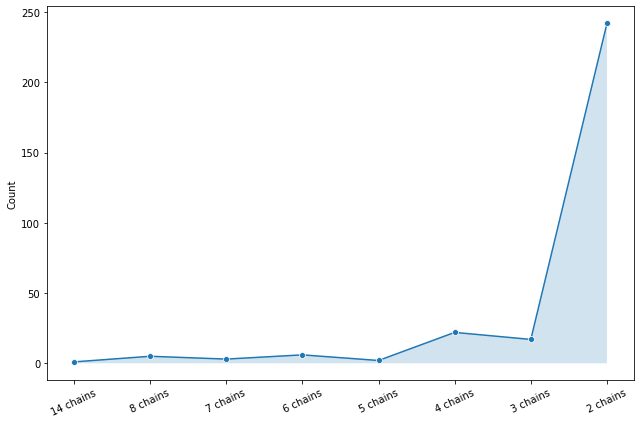

In [7]:
# Data
labels = ['2 chains', '3 chains', '4 chains', '5 chains', '6 chains', '7 chains', '8 chains', '14 chains']
sizes = [242, 17, 22, 2, 6, 3, 5, 1]

# Reverse the data
reversed_labels = labels[::-1]
reversed_sizes = sizes[::-1]



# Create the reversed line plot
plt.figure(figsize=(9, 6))
sns.lineplot(x=reversed_labels, y=reversed_sizes, marker='o')

# Add shading
plt.fill_between(reversed_labels, 0, reversed_sizes, alpha=0.2)

# Add labels and title
#plt.xlabel('Number of Unique Chains')
plt.ylabel('Count')
#plt.title('Cumulative Distribution of Structures by Unique Chain Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=25)
plt.grid(False)

# Adjust the plot layout
plt.tight_layout()

# Display the plot
plt.show()

In [18]:
data={}
for i in df2['number_of_chains'].unique():
    data[str(i)+' chains']=len(df2[df2['number_of_chains']==i])
data

{'2 chains': 700,
 '14 chains': 105,
 '8 chains': 172,
 '6 chains': 77,
 '7 chains': 56,
 '4 chains': 156,
 '5 chains': 24,
 '3 chains': 80}

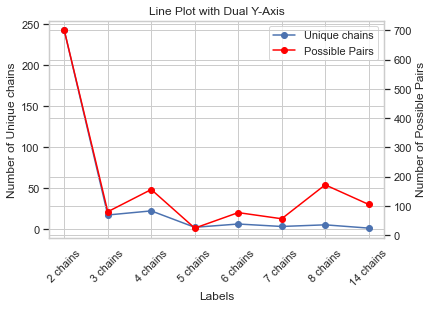

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['2 chains', '3 chains', '4 chains', '5 chains', '6 chains', '7 chains', '8 chains', '14 chains']
sizes1 = [242, 17, 22, 2, 6, 3, 5, 1]
sizes2 = [700, 80, 156, 24, 77, 56, 172, 105]

# Set the style of the plot
sns.set(style='whitegrid')

# Create a figure and axis objects
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
# Plot sizes1 as a line plot
ax1.plot(labels, sizes1, marker='o', label='Unique chains')
ax1.set_xlabel('Labels')
ax1.set_ylabel('Number of Unique chains')

# Create a secondary y-axis for sizes2
ax2 = ax1.twinx()
ax2.plot(labels, sizes2, marker='o', color='red', label='Possible Pairs')
ax2.set_ylabel('Number of Possible Pairs')

# Combine the legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

# Set the title
plt.title('Line Plot with Dual Y-Axis')

# Display the plot
plt.show()

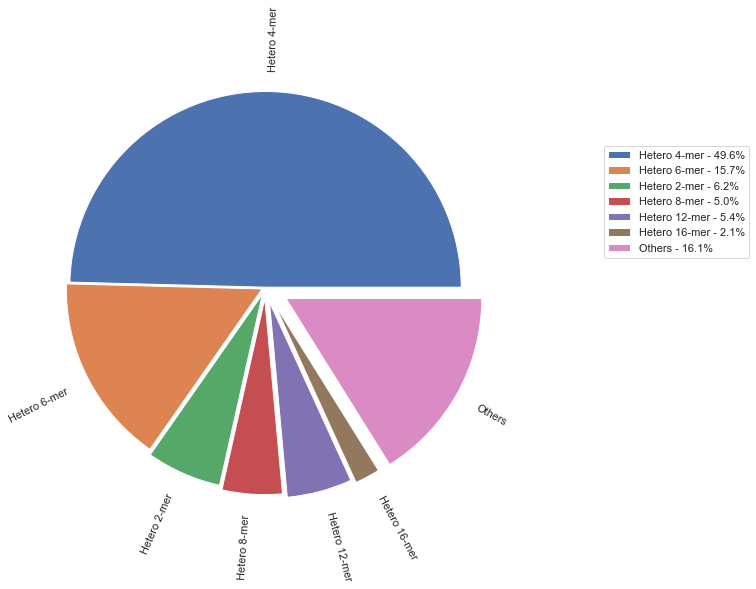

In [82]:
#Breaking down structures with 2 unique chains
dic = {'Hetero 4-mer': 120, 'Hetero 6-mer': 38, 'Hetero 2-mer': 15, 'Hetero 8-mer': 12, 'Hetero 24-mer': 4, 'Hetero 12-mer': 13, 'Hetero 10-mer': 3, 'Hetero 28-mer': 4, 'Hetero 480-mer': 2, 'Hetero 18-mer': 3, 'Hetero 14-mer': 3, 'Hetero 5-mer': 4, 'Hetero 7-mer': 2, 'Hetero 138-mer': 1, 'Hetero 42-mer': 1, 'Hetero 52-mer': 2, 'Hetero 104-mer': 2, 'Hetero 20-mer': 1, 'Hetero 48-mer': 1, 'Hetero 16-mer': 5, 'Hetero 45-mer': 1, 'Hetero 65-mer': 1, 'Hetero 240-mer': 1, 'Hetero 36-mer': 1, 'Hetero 955-mer': 1, 'Hetero 44-mer': 1}

# Calculate the total sum of values
total_sum = np.sum(list(dic.values()))

# Filter the values less than 4% and calculate their sum
others_sum = np.sum([value for value in dic.values() if value / total_sum < 0.02])

# Create a new dictionary with 'others' group
dic_filtered = {k: v for k, v in dic.items() if v / total_sum >= 0.02}
dic_filtered['Others'] = others_sum

# Create the pie plot
plt.figure(figsize=(9, 9))
explode = [i * 0.02 for i in range(len(dic_filtered))]
plt.pie(list(dic_filtered.values()), labels=list(dic_filtered.keys()), explode=explode, rotatelabels = 10)
plt.legend(frameon=True, 
          bbox_to_anchor=(1.5, 0.8), 
          labels=['%s - %1.1f%%' % (l, s / np.sum(list(dic_filtered.values())) * 100) for l, s in zip(list(dic_filtered.keys()), list(dic_filtered.values()))]
         )

# Add a title
#plt.title('Distribution of Structures by Chain Count')

# Display the plot
plt.show()

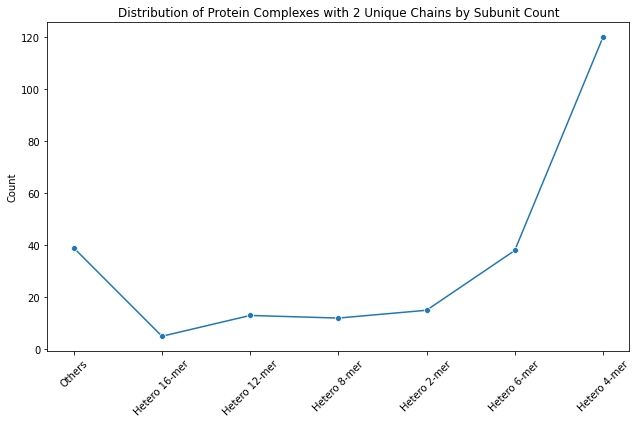

In [16]:
# Data
dic = {'Hetero 4-mer': 120, 'Hetero 6-mer': 38, 'Hetero 2-mer': 15, 'Hetero 8-mer': 12, 'Hetero 24-mer': 4, 'Hetero 12-mer': 13, 'Hetero 10-mer': 3, 'Hetero 28-mer': 4, 'Hetero 480-mer': 2, 'Hetero 18-mer': 3, 'Hetero 14-mer': 3, 'Hetero 5-mer': 4, 'Hetero 7-mer': 2, 'Hetero 138-mer': 1, 'Hetero 42-mer': 1, 'Hetero 52-mer': 2, 'Hetero 104-mer': 2, 'Hetero 20-mer': 1, 'Hetero 48-mer': 1, 'Hetero 16-mer': 5, 'Hetero 45-mer': 1, 'Hetero 65-mer': 1, 'Hetero 240-mer': 1, 'Hetero 36-mer': 1, 'Hetero 955-mer': 1, 'Hetero 44-mer': 1}

# Calculate the total sum of values
total_sum = np.sum(list(dic.values()))

# Filter the values less than 4% and calculate their sum
others_sum = np.sum([value for value in dic.values() if value / total_sum < 0.02])

# Create a new dictionary with 'others' group
dic_filtered = {k: v for k, v in dic.items() if v / total_sum >= 0.02}
dic_filtered['Others'] = others_sum

# Prepare data for plotting
labels = list(dic_filtered.keys())[::-1]
sizes = list(dic_filtered.values())[::-1]

# Create the line plot
plt.figure(figsize=(9, 6))
sns.lineplot(x=labels, y=sizes, marker='o')

# Add labels and title
plt.ylabel('Count')
plt.title('Distribution of Protein Complexes with 2 Unique Chains by Subunit Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

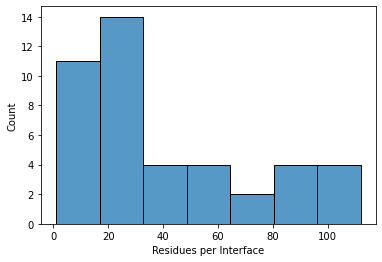

In [86]:
sns.histplot(df2[(df2['pdb_id']=='5LE5') & (df2['obs_contact']>0)]['obs_contact'])
plt.xlabel('Residues per Interface')
plt.ylabel('Count')

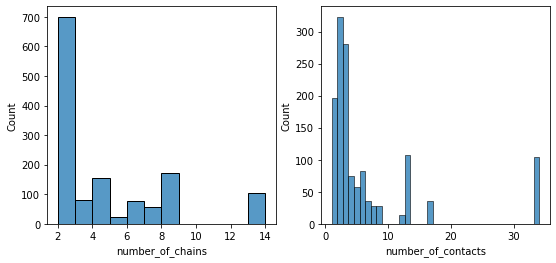

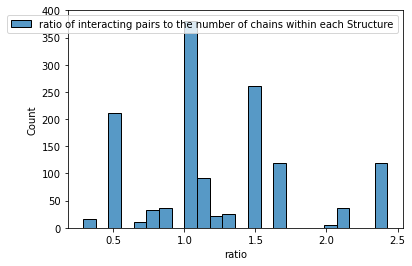

In [70]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(9, 4))
grouped = df2.groupby('pdb_id').mean()
#dis_of_chain_num=
sns.histplot(df2['number_of_chains'], label='Number of Chains within each Structure', bins=np.arange(2,15,1), ax=axes[0])
sns.histplot(df2['number_of_contacts'], label='Number of Contacts within each Structure',ax=axes[1])
plt.show()

sns.histplot(df2['ratio'], label='ratio of interacting pairs to the number of chains within each Structure')
plt.legend()
plt.show()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns in the DataFrame
scaled_df = scaler.fit_transform(df2[['number_of_chains', 'number_of_contacts']])

# Convert the scaled data into a DataFrame and assign column names
df_scaled = pd.DataFrame(scaled_df, columns=['number_of_chains', 'number_of_contacts'])

# Plot the distribution of the scaled number_of_chains and number_of_contacts
#sns.kdeplot(df_scaled['number_of_chains']/df_scaled['number_of_chains'], shade=True, clip=(0,None), label='Number of Chains within each Structure')
#plt.legend()
#plt.show()

34
first heptamer and second heptamer
16 22 21 17 12 19 20 
 second heptamer and third heptamer
54 54 38 38 54 54 72 
 first heptamer within itself
101 97 112 90 93 94 98 
 second heptamer within itself
87 34 38 32 44 59 29 

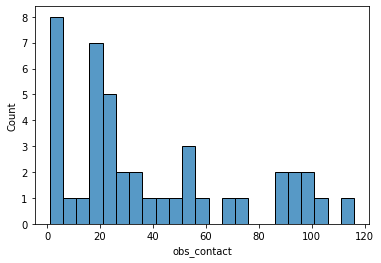

In [9]:
pd.options.display.max_rows = None
#display(df2[df2['pdb_id']=='5LE5'].sort_values(by=['chain1']))

sns.histplot(df2[(df2['pdb_id']=='5LE5')]['obs_contact'],bins=np.arange(1,120,5))
print (len(df2[(df2['pdb_id']=='5LE5')&(df2['obs_contact']>=10)]))
print ('first heptamer and second heptamer')
for i in range(7):
    c1,c2=sorted([[i for i in 'ABCDEFG'][i],[i for i in 'HIJKLab'][i]])
    print (int(df2[(df2['pdb_id']=='5LE5')&(df2.chain1==c1)&(df2.chain2==c2)]['obs_contact']),end= ' ')
print ('\n','second heptamer and third heptamer')
for i in range(7):
    c1,c2=sorted([[i for i in 'HIJKLab'][i],[i for i in 'aLKJIHb'][i]]) #'HIJKLMN' & 'aZYXWVU'
    print (int(df2[(df2['pdb_id']=='5LE5')&(df2.chain1==c1)&(df2.chain2==c2)]['obs_contact']),end= ' ')
print ('\n','first heptamer within itself')
for i in range(7):
    c1,c2=sorted([[i for i in 'ABCDEFG'][i],[i for i in 'BCDEFGA'][i]])
    print (int(df2[(df2['pdb_id']=='5LE5')&(df2.chain1==c1)&(df2.chain2==c2)]['obs_contact']),end= ' ')
print ('\n','second heptamer within itself')
for i in range(7):
    c1,c2=sorted([[i for i in 'HIJKLab'][i],[i for i in 'IJKLabH'][i]])
    print (int(df2[(df2['pdb_id']=='5LE5')&(df2.chain1==c1)&(df2.chain2==c2)]['obs_contact']),end= ' ')

In [101]:
for i in 'HIJKLab':
    print (len(df2[(df2['pdb_id']=='5LE5') & (df2['obs_contact']>0) & (df2['pair'].str.contains('_%s'%i))]))
df2[(df2['pdb_id']=='5LE5') & (df2['obs_contact']>0)]

6
6
5
5
6
5
5


,pair,chain1,chain2,pdb_id,number_of_chains,obs_contact,number_of_contacts,ratio
3,5LE5_C_5LE5_K,C,K,5LE5,14,17,34,2.428571
18,5LE5_J_5LE5_J,J,J,5LE5,14,54,34,2.428571
69,5LE5_H_5LE5_b,H,b,5LE5,14,29,34,2.428571
176,5LE5_F_5LE5_G,F,G,5LE5,14,94,34,2.428571
208,5LE5_B_5LE5_C,B,C,5LE5,14,97,34,2.428571
222,5LE5_C_5LE5_J,C,J,5LE5,14,21,34,2.428571
223,5LE5_D_5LE5_F,D,F,5LE5,14,1,34,2.428571
227,5LE5_A_5LE5_D,A,D,5LE5,14,1,34,2.428571
281,5LE5_C_5LE5_D,C,D,5LE5,14,112,34,2.428571
302,5LE5_A_5LE5_C,A,C,5LE5,14,5,34,2.428571


1

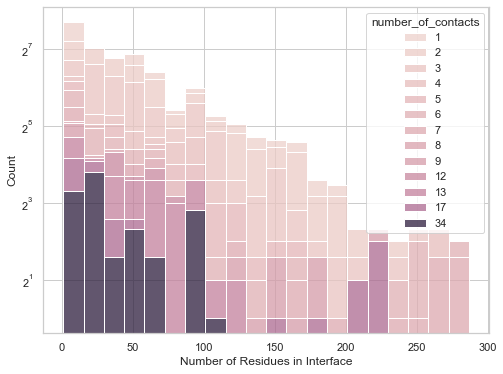

In [55]:
plt.figure(figsize=(8, 6))
plt.yscale('log',base=2)
sns.histplot(data=df2[(df2.obs_contact<300) & (df2.obs_contact>0)], x="obs_contact", hue="number_of_contacts", multiple="stack")
plt.xlabel('Number of Residues in Interface')

#print (df2[df2['number_of_chains']==2]['obs_contact'].describe())
#print (df2[df2['number_of_chains']==3]['obs_contact'].describe())
#print (df2[df2['number_of_chains']==4]['obs_contact'].describe())
len(df2[df2['number_of_chains']==14].sort_values(by=['pair'])['pdb_id'].unique())


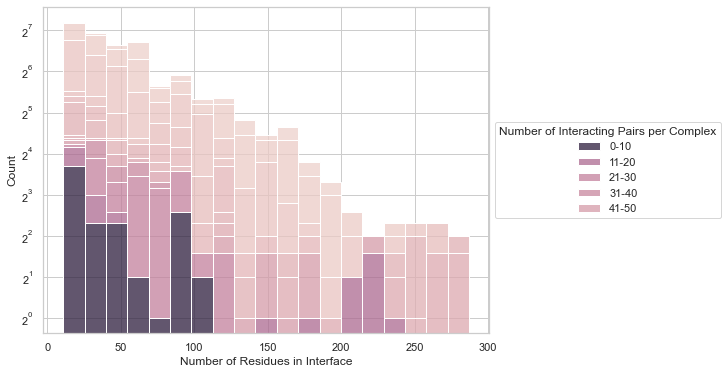

In [74]:
df3 = df2[df2['obs_contact'] > 10][['pair', 'pdb_id', 'obs_contact', 'number_of_contacts']].sort_values('pdb_id')

plt.figure(figsize=(8, 6))
plt.yscale('log', base=2)
ax = sns.histplot(data=df3[(df3.obs_contact < 300) & (df3.obs_contact > 0)], x="obs_contact", hue="number_of_contacts", multiple="stack")

# Specify the legend labels
legend_labels = ["0-10", "11-20", "21-30", "31-40", "41-50"]  # Update with your desired labels

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Number of Interacting Pairs per Complex', labels=legend_labels)

plt.xlabel('Number of Residues in Interface')
plt.show()